In [5]:
import numpy as np
import time


def randomized_svd(A, target_rank, p=8):
    M, N = A.shape
    Sigma = np.random.rand(N, target_rank + p)
    B = A @ Sigma
    Q, R = np.linalg.qr(B)
    U_0, Sigma_0, V_0 = np.linalg.svd(Q.T @ A)
    U_r = Q @ U_0
    return U_r[:, :target_rank], Sigma_0[:target_rank], V_0[:target_rank, :]

def A(i, j):
    return 1.0/( i+j+1)

In [6]:
M = 1500 # number of rows
N = 1024 # number of columns
x = np. linspace (1,N,N) # grid for drawings
r = 20 # target rank
# fill the matrix Ma
Ma=np. fromfunction (A, [M, N])

In [7]:
# Estimate the time , does not save the data
start = time.time ()
U, s, V = np.linalg .svd(Ma)
## Truncation of SVD
Ut = U[: ,:r] # m \ times r
st = s[:r] # r
Vt = V[:r ,:] # # r \ times n
print("Classical ", time.time () - start , "sec")
start = time.time ()
Ur , sr , Vr = randomized_svd(Ma, target_rank=r)
print("Randomized ", time.time () - start , "sec")

Classical  0.5031540393829346 sec
Randomized  0.023882150650024414 sec


Relative error of sigmas = 8.771368516309142e-16
Classical relative approximation error = 3.322659005756001e-11
Randomized straight-forward error = 3.322662390607351e-11
Initial storage: 1536000 memory cells
Compressed storage: 50500 memory cells


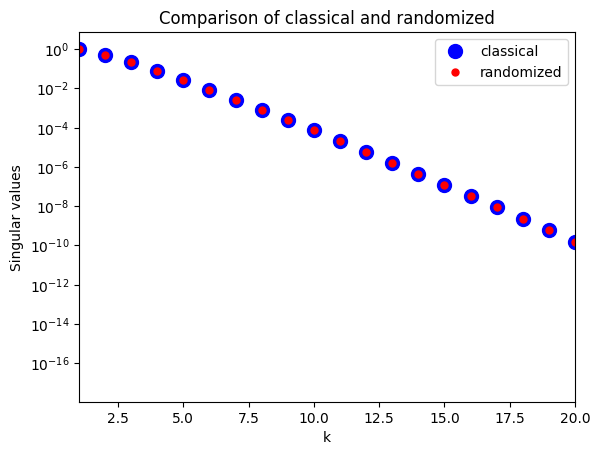

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Check the error for singular values
plt.title("Comparison of classical and randomized")
plt.plot(x, s/s[0], 'bo', markersize=10, label='classical')
plt.plot(x[:r], sr/s[0], 'ro', markersize=5, label='randomized')
plt.ylabel('Singular values')
plt.xlabel('k')
plt.xlim(1, r)
plt.legend()
plt.yscale('log')

relative_error_sigma = np.linalg.norm(s[:r] - sr) / np.linalg.norm(s[:r])
print("Relative error of sigmas =", relative_error_sigma)

classical_relative_approximation_error = np.linalg.norm(s[r:]) / np.linalg.norm(s)
print("Classical relative approximation error =", classical_relative_approximation_error)

randomized_forward_error = np.linalg.norm(Ma - (Ur @ np.diag(sr) @ Vr)) / np.linalg.norm(s)
print("Randomized straight-forward error =", randomized_forward_error)

initial_storage = M*N
print("Initial storage:", initial_storage, "memory cells")

compressed_storage = (1 + M + N) * r
print("Compressed storage:", compressed_storage, "memory cells")
